   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

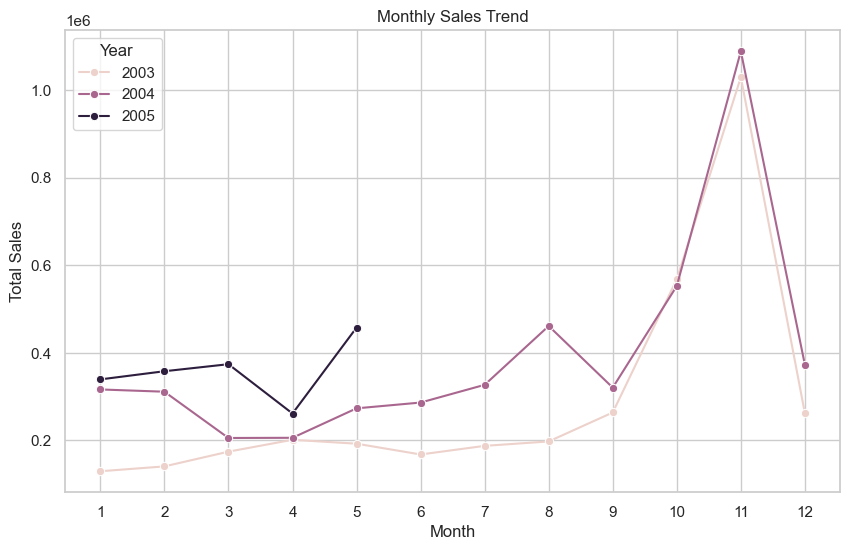

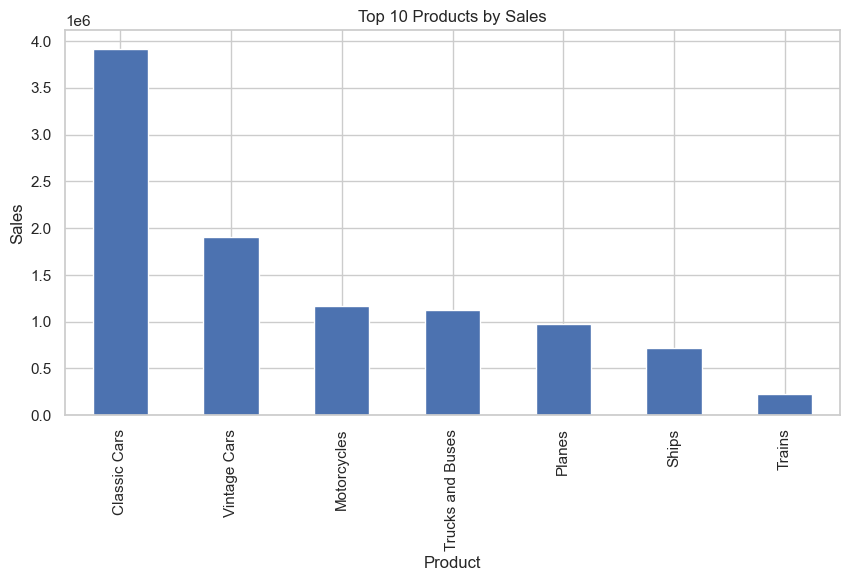

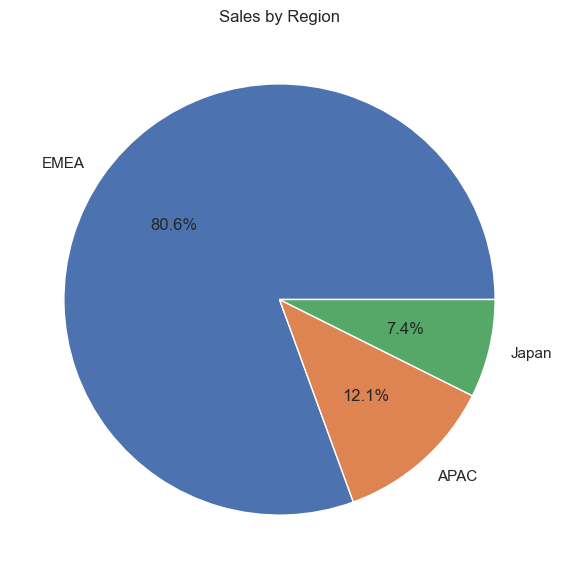

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Load the dataset
#df = pd.read_csv("C:\Users\Raviprasath A\Documents\sales-analysis\sales_data.csv")

df = pd.read_csv(r"C:\Users\Raviprasath A\Documents\sales-analysis\sales_data.csv", encoding='ISO-8859-1')


# Preview the data
print(df.head())

# Basic info
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Convert Date column to datetime (if exists)
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Add Month and Year columns
df['Month'] = df['ORDERDATE'].dt.month
df['Year'] = df['ORDERDATE'].dt.year

# Total Sales per Month
monthly_sales = df.groupby(['Year', 'Month'])['SALES'].sum().reset_index()

# Plot monthly sales
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales, x='Month', y='SALES', hue='Year', marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.xticks(range(1,13))
plt.show()

# Top 10 Products
top_products = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(10,5), title='Top 10 Products by Sales')
plt.ylabel("Sales")
plt.xlabel("Product")
plt.show()

# Sales by Region
region_sales = df.groupby('TERRITORY')['SALES'].sum().sort_values(ascending=False)
region_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(7,7), title='Sales by Region')
plt.ylabel("")
plt.show()
